In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
import seaborn as sns


In [2]:
diabetes = load_diabetes()
#print(diabetes)
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [3]:
diabetes.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

## Data exploration

In [4]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [5]:
df = pd.DataFrame(data = diabetes.data, columns = diabetes.feature_names)
df['target']=diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [6]:
df['target'].sort_values(ascending = False) 

256    346.0
32     341.0
138    336.0
290    332.0
362    321.0
       ...  
260     39.0
201     39.0
57      37.0
297     31.0
156     25.0
Name: target, Length: 442, dtype: float64

In [7]:
df.info() #total number of rows, each attribute’s type and number of non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
age       442 non-null float64
sex       442 non-null float64
bmi       442 non-null float64
bp        442 non-null float64
s1        442 non-null float64
s2        442 non-null float64
s3        442 non-null float64
s4        442 non-null float64
s5        442 non-null float64
s6        442 non-null float64
target    442 non-null float64
dtypes: float64(11)
memory usage: 38.1 KB


In [8]:
df.describe() #summary of each numerical attribute

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


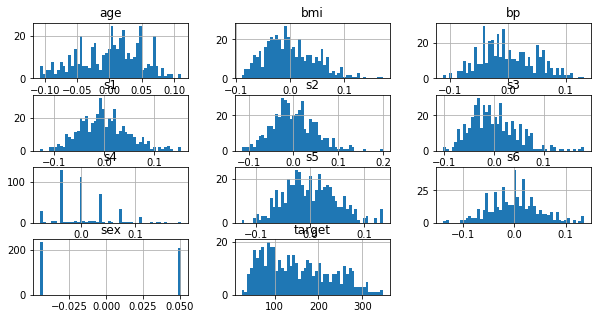

In [9]:
%matplotlib inline
df.hist(bins=50, figsize=(10,5))
plt.show()

In [10]:
df.corr()['target'].sort_values(ascending = False)

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441484
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64

In [11]:
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


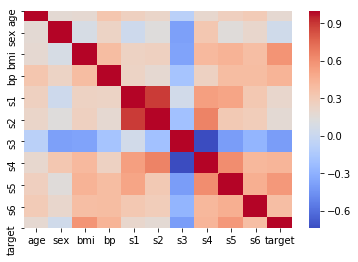

In [12]:
# red colours present more correlation
corr_matrix = df.corr()
#print (corr_matrix)
sns.heatmap(data = corr_matrix, cmap = 'coolwarm', xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)

## Data preparation

In [13]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1:]

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

train_data = pd.DataFrame(data = y_train)

In [14]:
#from pandas.plotting import scatter_matrix

#attributes = ['age', 'sex', 'bmi', 'bp']
#scatter_matrix(train_data[attributes], c= train_data['target'], figsize=(10, 6));

In [15]:
#use dummy regression to see the fittness of the model

In [16]:
X_train.shape

(331, 10)

In [17]:
y_train.shape

(331, 1)

## Regression
### Linear Regression
#### Single Variable

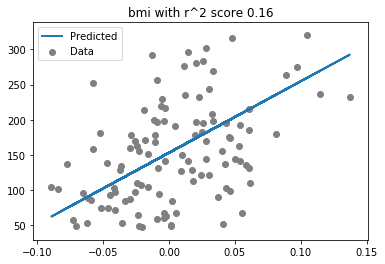

In [18]:
from sklearn.linear_model import LinearRegression

def linreg_plot(Xdata):
    '''Xdata: variable
    '''
    linreg = LinearRegression()
    x2 = df[Xdata].values.reshape(-1,1)
    y2 = df['target']
    X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, random_state=0)
    
    linreg.fit(X_train2, y_train2)
    linreg_score = linreg.score(X_test2, y_test2)
    predictions = linreg.predict(X_test2)
    
    plt.figure()
    plt.title(str(Xdata)+' with r^2 score {:.2f}'.format(linreg_score))
    plt.plot(X_test2, predictions, linewidth = 2, label='Predicted')
    plt.scatter(X_test2, y_test2, color = 'gray', label='Data')
    plt.legend()
    plt.show()
    
linreg_plot('bmi')

In [19]:
for Xdata in diabetes.feature_names:
    '''Xdata: variable
    '''
    linreg = LinearRegression()
    x2 = df[Xdata].values.reshape(-1,1)
    y2 = df['target']
    X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, random_state=0)
    
    linreg.fit(X_train2, y_train2)
    linreg_score = linreg.score(X_test2, y_test2)
    linreg_score2 = linreg.score(X_train2, y_train2)    
    print('For', Xdata, 'the score on the test set is:', linreg_score)
    print('For', Xdata, 'the score on the train set is:', linreg_score2)
    print('\n')

For age the score on the test set is: 0.03562250041105597
For age the score on the train set is: 0.03517202432354194


For sex the score on the test set is: -0.00028672862888390327
For sex the score on the train set is: 0.0023243883047695535


For bmi the score on the test set is: 0.15772057992609445
For bmi the score on the train set is: 0.3910209317624973


For bp the score on the test set is: 0.13787637586973456
For bp the score on the train set is: 0.20885954553521813


For s1 the score on the test set is: 0.03820115115476308
For s1 the score on the train set is: 0.04657843367805803


For s2 the score on the test set is: 0.038235604189850725
For s2 the score on the train set is: 0.028149573005873285


For s3 the score on the test set is: 0.06399006639614913
For s3 the score on the train set is: 0.17854870377350895


For s4 the score on the test set is: 0.14921172857882947
For s4 the score on the train set is: 0.19455355534664964


For s5 the score on the test set is: 0.228697648654

#### Multivariate

In [20]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg_score = linreg.score(X_test, y_test)
linreg_score_train = linreg.score(X_train, y_train)
print('The score on the test set is:', linreg_score)
print('The score on the train set is:', linreg_score_train)

coefficients = linreg.coef_
intercept = linreg.intercept_
predictions = linreg.predict(X_test)
print('The coefficents are:', coefficients, '\n', 'The intercept is:', intercept)

The score on the test set is: 0.35940090989715556
The score on the train set is: 0.555437148935302
The coefficents are: [[ -43.26774487 -208.67053951  593.39797213  302.89814903 -560.27689824
   261.47657106   -8.83343952  135.93715156  703.22658427   28.34844354]] 
 The intercept is: [153.06798218]


We get a low value for $R^2$ (0.36) which indicates that our model is not very accurate and thus it may be overfitting the data.

### Ridge Regression

It uses the L2 regularisation to minimize the magnitude of the coefficents.

In [21]:
from sklearn.linear_model import Ridge

for i_alpha in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    linridge = Ridge(alpha = i_alpha)
    linridge.fit(X_train, y_train)
    r2_train = linridge.score(X_train, y_train)
    r2_test = linridge.score(X_test, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('For alpha = {:.2f}, r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(i_alpha, r2_train, r2_test))

For alpha = 0.00, r-squared training: 0.56, r-squared test: 0.36

For alpha = 0.01, r-squared training: 0.55, r-squared test: 0.36

For alpha = 0.10, r-squared training: 0.55, r-squared test: 0.37

For alpha = 1.00, r-squared training: 0.46, r-squared test: 0.36

For alpha = 10.00, r-squared training: 0.17, r-squared test: 0.14

For alpha = 100.00, r-squared training: 0.02, r-squared test: 0.02

For alpha = 1000.00, r-squared training: 0.00, r-squared test: 0.00



### Lasso Regression

It uses the L1 regularisation to shrink the magnitude of the less important coefficents to zero.

In [22]:
from sklearn.linear_model import Lasso

for alpha in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    linlasso = Lasso(alpha)
    linlasso.fit(X_train, y_train)
    r2_train = linlasso.score(X_train, y_train)
    r2_test = linlasso.score(X_test, y_test)
    
    print('For alpha = {:.2f}, r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(alpha, r2_train, r2_test))

For alpha = 0.00, r-squared training: 0.56, r-squared test: 0.36

For alpha = 0.01, r-squared training: 0.55, r-squared test: 0.35

For alpha = 0.10, r-squared training: 0.55, r-squared test: 0.36

For alpha = 1.00, r-squared training: 0.41, r-squared test: 0.28

For alpha = 10.00, r-squared training: 0.00, r-squared test: -0.00

For alpha = 100.00, r-squared training: 0.00, r-squared test: -0.00

For alpha = 1000.00, r-squared training: 0.00, r-squared test: -0.00



### K-nearest neighbours

In [28]:
from sklearn.neighbors import KNeighborsRegressor

for k in [1,2,3,4,5]:
    knnreg = KNeighborsRegressor(n_neighbors = k)
    knnreg.fit(X_train, y_train)
    score_knn = knnreg.score(X_test, y_test)
    score_knn_train = knnreg.score(X_train, y_train)
    predictions_knn = knnreg.predict(X_test)
    #print(predictions_knn)
    print('For k = {:.2f}, r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(k, score_knn_train, score_knn))

For k = 1.00, r-squared training: 1.00, r-squared test: -0.55

For k = 2.00, r-squared training: 0.78, r-squared test: -0.08

For k = 3.00, r-squared training: 0.71, r-squared test: 0.15

For k = 4.00, r-squared training: 0.63, r-squared test: 0.18

For k = 5.00, r-squared training: 0.62, r-squared test: 0.19

